# Amazon CS books dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('./books.csv', parse_dates=True)
books.head(5)

,title,description,author,isbn10,isbn13,publish_date,edition,best_seller,top_rated,rating,review_count,price
0,The Staff Engineer's Path,A Guide for Individual Contributors Navigating...,Tanya Reilly,1098118731,978-1098118730,2022-10-25,1,yes,no,"4,7",189.0,"31,99"
1,Cracking the Coding Interview,189 Programming Questions and Solutions,Gayle Laakmann McDowell,984782869,978-0984782857,2015-07-01,6,yes,no,"4,7",8334.0,"33,21"
2,"Python Crash Course, 3rd Edition","A Hands-On, Project-Based Introduction to Prog...",Eric Matthes,1718502702,978-1718502703,2023-01-10,3,yes,no,"4,8",165.0,"30,61"
3,The Pragmatic Programmer,"20th Anniversary Edition, 2nd Edition: Your Jo...",David Thomas,NaN,978-0135957059,2019-09-13,2,yes,no,"4,8",2521.0,38
4,Clean Code,A Handbook of Agile Software Craftsmanship,"Robert C, Martin",NaN,978-0132350884,2008-08-01,1,yes,no,"4,7",5639.0,40


### Check the count of null values in each Column

In [77]:
null_count = books.isna().sum()
null_count = pd.DataFrame(null_count)
# print(null_count.index)
# print(null_count.columns)
# null_count[1] = 0
null_count = null_count.T
# null_count.rename(columns={0: "null_count"}, inplace=True)
null_count
# null_count.set_index('null_count')

KeyError: "None of ['null_count'] are in the columns"

In [73]:
mask = books.notnull()
not_null = books.where(mask)
not_null_head = not_null.head()
result = pd.concat([not_null_head, null_count], axis=0)
result

,title,description,author,isbn10,isbn13,publish_date,edition,best_seller,top_rated,rating,review_count,price
0,The Staff Engineer's Path,A Guide for Individual Contributors Navigating...,Tanya Reilly,1098118731,978-1098118730,2022-10-25,1,yes,no,"4,7",189.0,"31,99"
1,Cracking the Coding Interview,189 Programming Questions and Solutions,Gayle Laakmann McDowell,984782869,978-0984782857,2015-07-01,6,yes,no,"4,7",8334.0,"33,21"
2,"Python Crash Course, 3rd Edition","A Hands-On, Project-Based Introduction to Prog...",Eric Matthes,1718502702,978-1718502703,2023-01-10,3,yes,no,"4,8",165.0,"30,61"
3,The Pragmatic Programmer,"20th Anniversary Edition, 2nd Edition: Your Jo...",David Thomas,NaN,978-0135957059,2019-09-13,2,yes,no,"4,8",2521.0,38
4,Clean Code,A Handbook of Agile Software Craftsmanship,"Robert C, Martin",NaN,978-0132350884,2008-08-01,1,yes,no,"4,7",5639.0,40
0,1,80,2,101,2,4,3,0,0,4,4.0,3


Text(0.5, 1.0, 'No. null values by column')

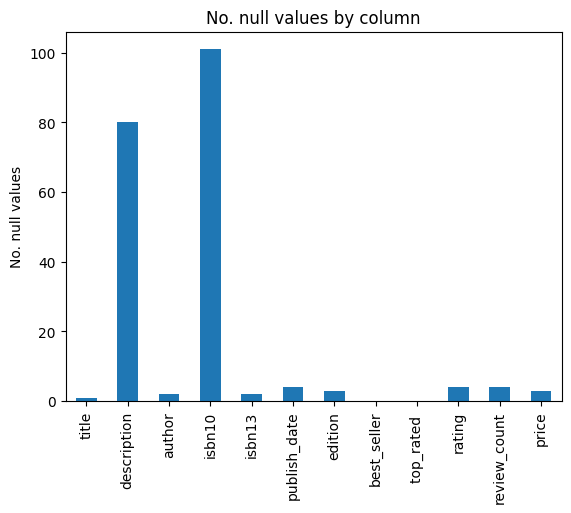

In [10]:
null_fig = null_count.plot(kind='bar')
null_fig.set_ylabel('No. null values')
null_fig.set_title('No. null values by column')

### Do you want to drop any column?

In [16]:
books.columns

Index(['title', 'description', 'author', 'isbn10', 'isbn13', 'publish_date',
       'edition', 'best_seller', 'top_rated ', 'rating', 'review_count',
       'price'],
      dtype='object')

In [29]:
to_drop = ['isbn10', 'isbn13', 'best_seller']
df = books.drop(to_drop, axis=1)
df.head()

,title,description,author,publish_date,edition,top_rated,rating,review_count,price
0,The Staff Engineer's Path,A Guide for Individual Contributors Navigating...,Tanya Reilly,2022-10-25,1,no,"4,7",189.0,"31,99"
1,Cracking the Coding Interview,189 Programming Questions and Solutions,Gayle Laakmann McDowell,2015-07-01,6,no,"4,7",8334.0,"33,21"
2,"Python Crash Course, 3rd Edition","A Hands-On, Project-Based Introduction to Prog...",Eric Matthes,2023-01-10,3,no,"4,8",165.0,"30,61"
3,The Pragmatic Programmer,"20th Anniversary Edition, 2nd Edition: Your Jo...",David Thomas,2019-09-13,2,no,"4,8",2521.0,38
4,Clean Code,A Handbook of Agile Software Craftsmanship,"Robert C, Martin",2008-08-01,1,no,"4,7",5639.0,40
